In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [9]:
from load_data import load_data

# read the dataset 

data = load_data('../data/data.zip', filename='MachineLearningRating_v3.txt')

In [10]:
# Explore the first few rows
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [11]:
# Find the number of rows and columns
data.shape

(1000098, 52)

In [12]:
from data_processing import DataProcessing
# Create instance of the class
data_processing = DataProcessing(data)

# Summary of Missing data
missing_summary = data_processing.missing_data_summary()

# Display results
missing_summary

,Missing Count,Percentage (%)
NumberOfVehiclesInFleet,1000098,100.000000
CrossBorder,999400,99.930207
CustomValueEstimate,779642,77.956560
WrittenOff,641901,64.183810
Converted,641901,64.183810
Rebuilt,641901,64.183810
NewVehicle,153295,15.327998
Bank,145961,14.594670
AccountType,40232,4.022806
Gender,9536,0.953507


In [13]:
cols_to_drop = ['NumberOfVehiclesInFleet', 
                'CrossBorder', 
                'CustomValueEstimate', 
                'Converted', 'Rebuilt', 
                'WrittenOff']

# Drop these columns
data = data_processing.handle_missing_data('high', cols_to_drop)

In [14]:
# Impute or drop columns with moderate missing data
missing_cols = ['NewVehicle', 'Bank', 'AccountType']
data = data_processing.handle_missing_data('moderate', missing_cols)

In [15]:

missing_cols = ['Gender', 'MaritalStatus', 'Cylinders', 'cubiccapacity', 
                'kilowatts', 'NumberOfDoors', 'VehicleIntroDate', 'Model', 
                'make', 'VehicleType', 'mmcode', 'bodytype', 'CapitalOutstanding']

data = data_processing.handle_missing_data('low', missing_cols)

In [16]:
# Checking duplicates
data.duplicated().sum()

np.int64(74)

In [17]:
num_cols = ['SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']
display(data[num_cols].describe())

,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [18]:

data_types = data.dtypes

data_types.reset_index(name='data type')

,index,data type
0,UnderwrittenCoverID,int64
1,PolicyID,int64
2,TransactionMonth,object
3,IsVATRegistered,bool
4,Citizenship,object
5,LegalType,object
6,Title,object
7,Language,object
8,Bank,object
9,AccountType,object


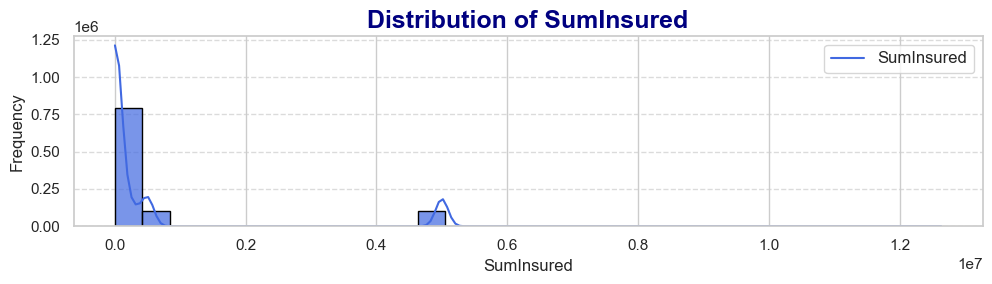

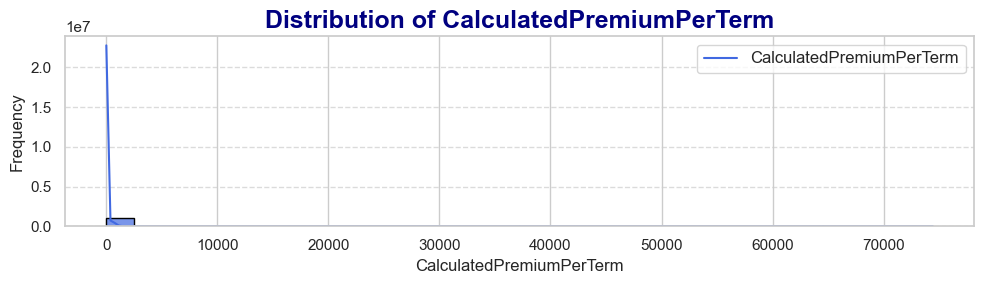

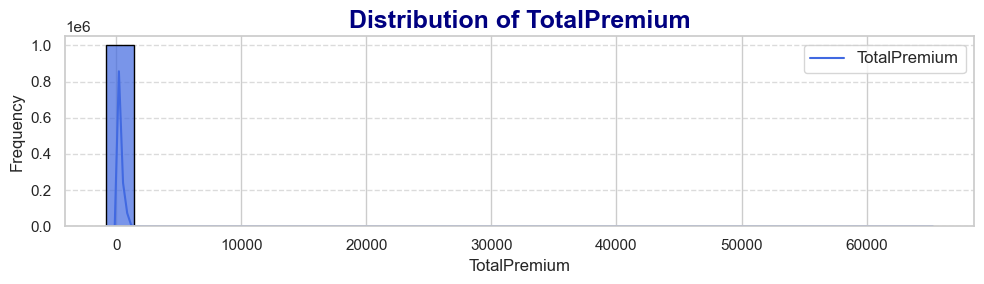

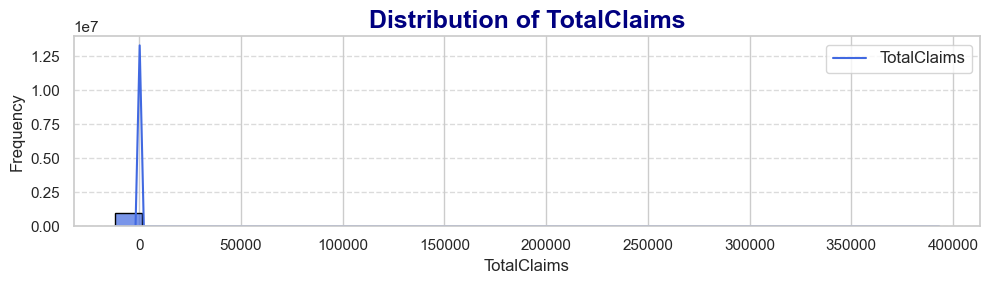

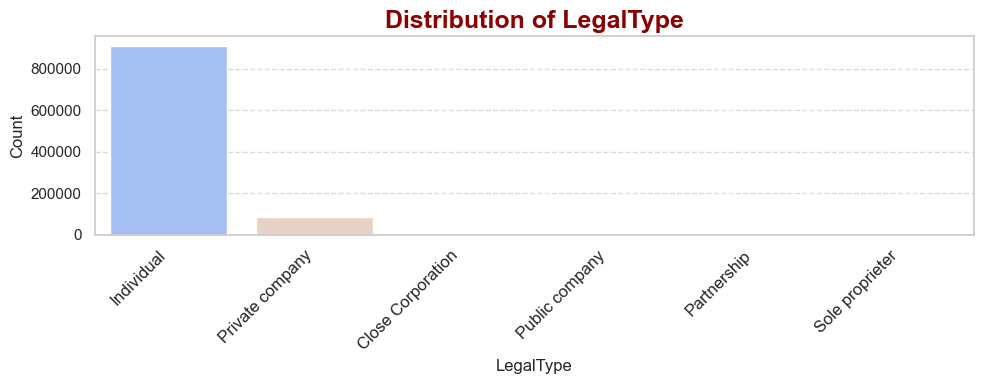

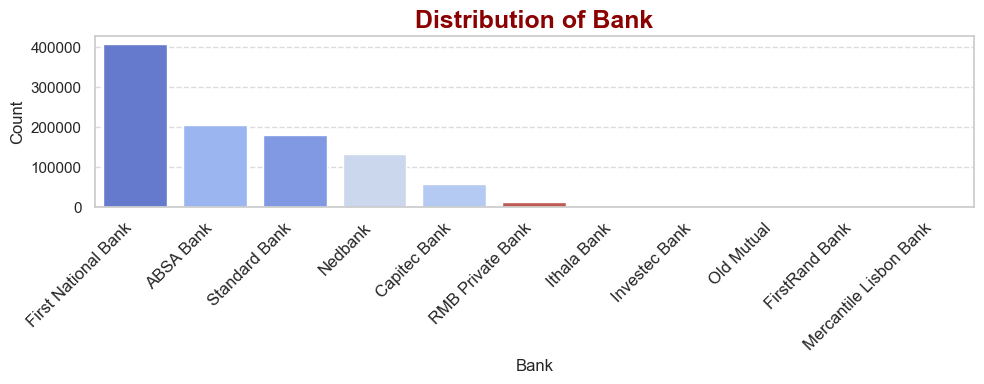

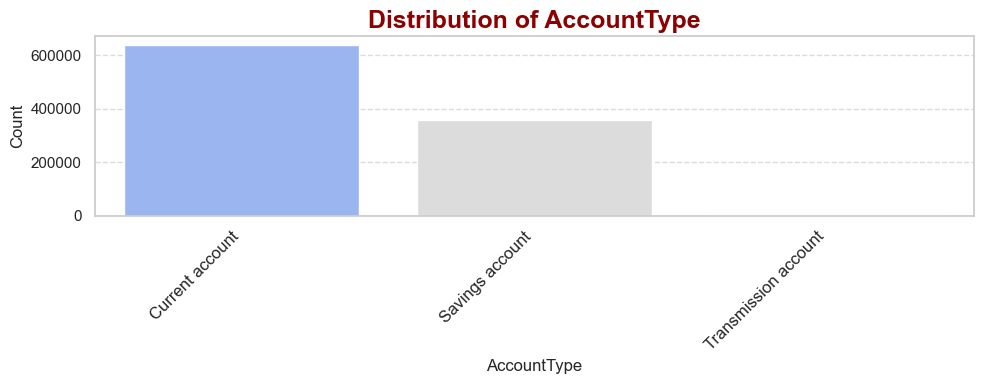

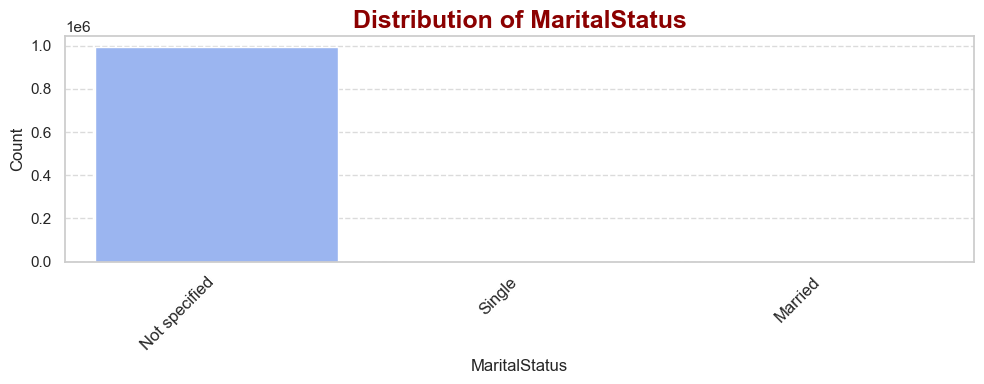

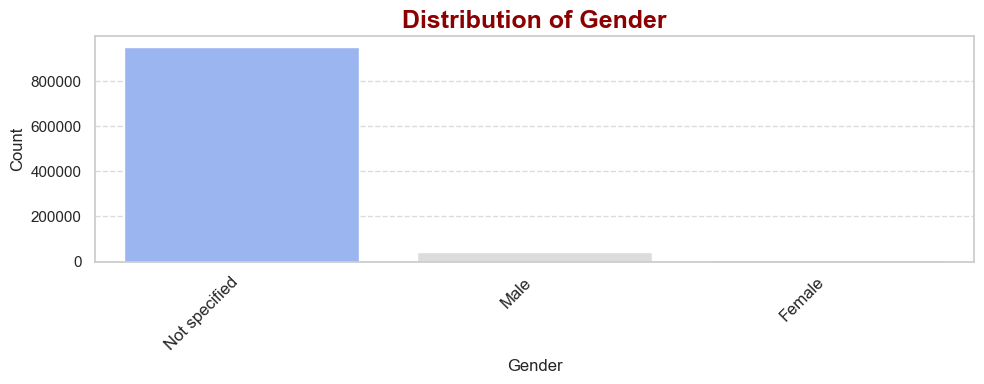

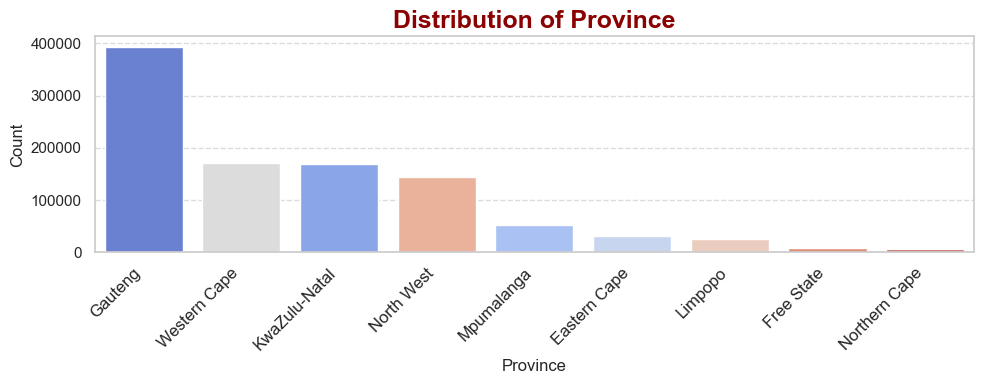

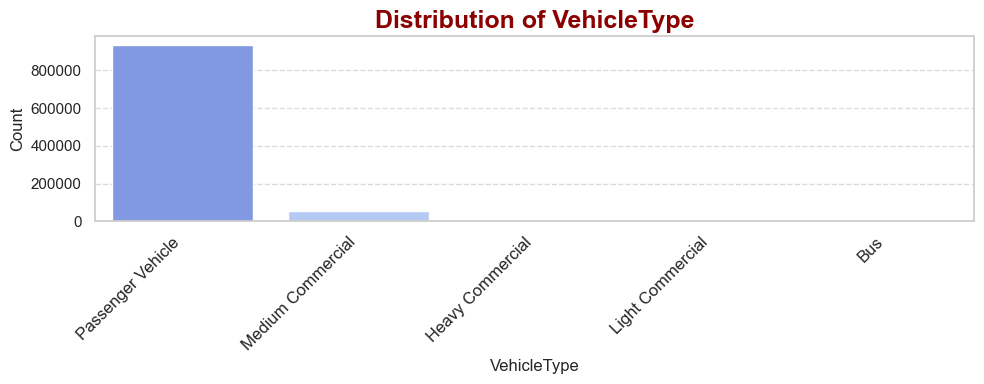

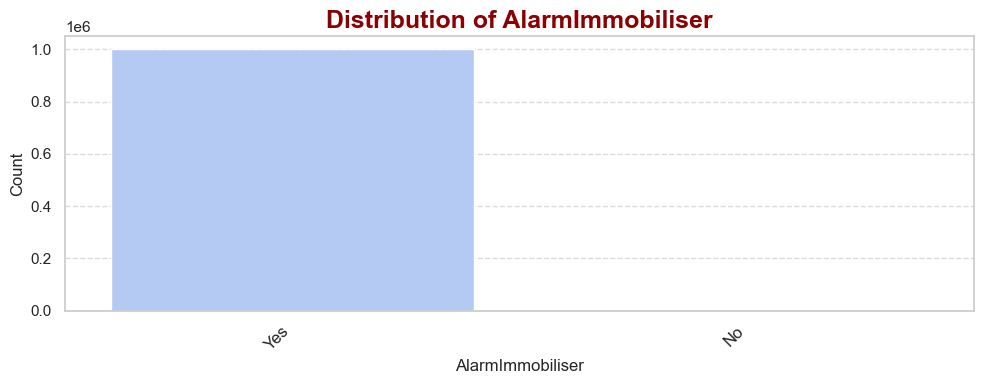

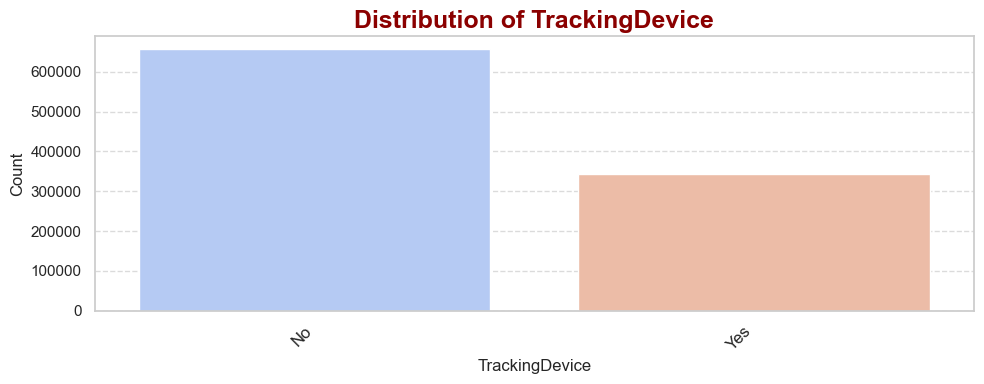

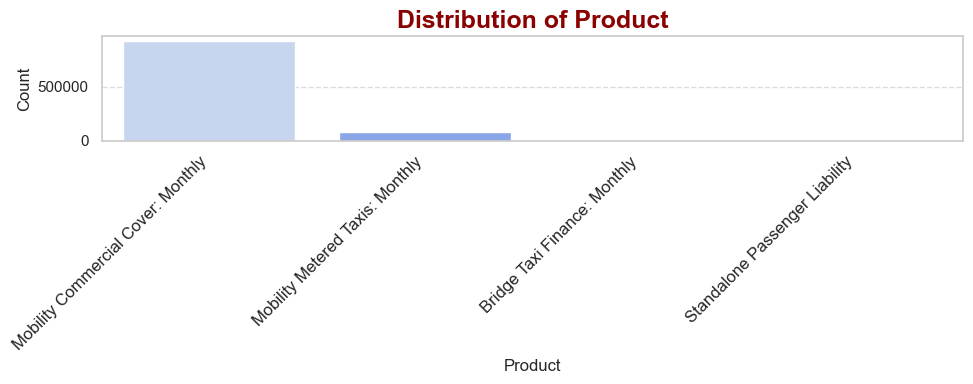

In [21]:
from data_visualization import DataVisualizer
# Create instance of the class
vis = DataVisualizer(data)

# Define numerical columns
numerical_cols = [
    'SumInsured', 'CalculatedPremiumPerTerm', 
    'TotalPremium', 'TotalClaims'
]
# Define categorical columns
categorical_cols = [
    'LegalType', 'Bank', 'AccountType', 'MaritalStatus', 
    'Gender', 'Province', 'VehicleType', 
    'AlarmImmobiliser', 'TrackingDevice', 
    'Product'
]

vis.univariate_analysis(numerical_cols, categorical_cols)

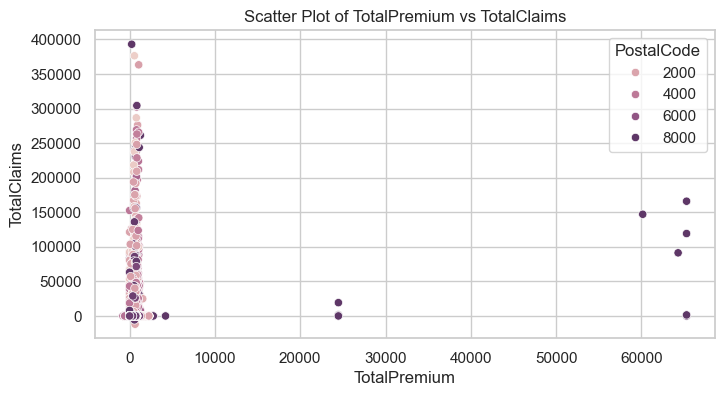

In [22]:
x_col = 'TotalPremium'
y_col = 'TotalClaims'
col_hue = 'PostalCode'

# Plot scatter plot
vis.scatter_plot(x_col, y_col, col_hue)

Insights from the Scatter Plot of Total Premium vs. Total Claims

Relationship: There is a weak positive correlation between total premium and total claims, indicating that higher premiums generally correspond to higher claims, though the relationship is not strong.

Clustering: Most data points cluster in the lower ranges for both total premiums and claims, suggesting many policies have minimal claims.

Outliers: A few outliers with very high premiums or claims, or both, could represent policies with unique characteristics that require further investigation.

Postal Code Impact: While color-coding by postal code suggests possible regional variations, no clear pattern emerges from the plot, requiring further analysis to explore regional impacts.

Overall: The scatter plot shows a general but weak relationship between premiums and claims, with common clusters and a few notable outliers.

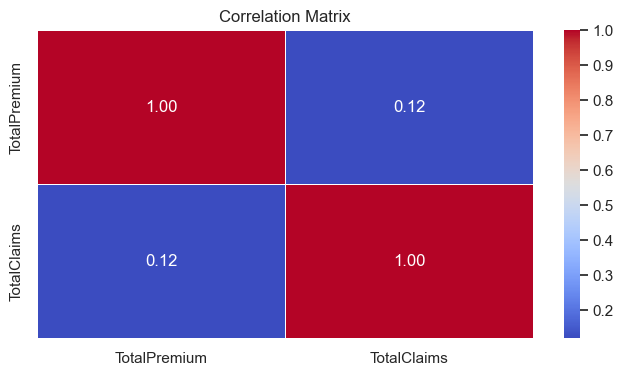

In [23]:
# Compute correlation matrix
cols = ['TotalPremium', 'TotalClaims']

vis.correlation_matrix(cols)

Insights from the Correlation Matrix

Correlation: The correlation between Total Premium and Total Claims is weak at 0.12, indicating a slight tendency for higher premiums to be associated with higher claims, but not strongly.

Interpretation: With a correlation of 0.12, only a small portion of the variation in claims is explained by premiums. Other factors, such as policyholder characteristics or vehicle type, likely have a greater impact on claim amounts.

Conclusion: While there is a weak positive correlation, it suggests that other variables are more significant in influencing claim amounts. Further analysis of these factors is needed for better risk assessment and pricing strategies.

Data Comparison

Trends Over Geography: Compare the change in insurance cover type, premium, auto make, etc.

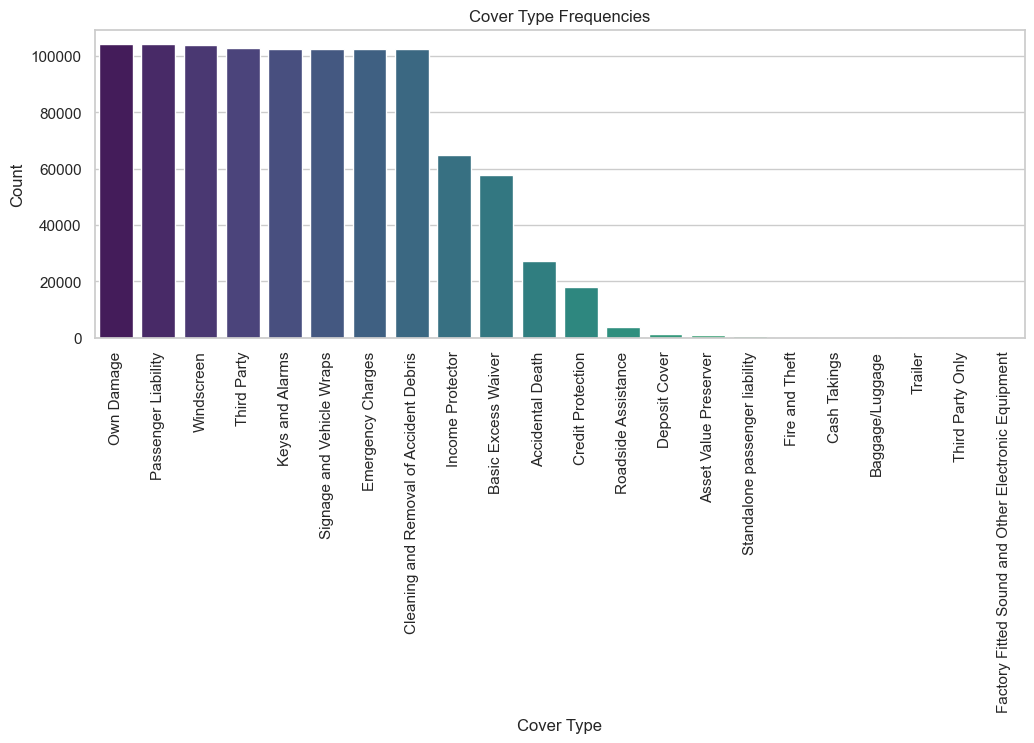

In [24]:
cover_type_counts = data['CoverType'].value_counts()

# Create a bar chart with a color palette
plt.figure(figsize=(12, 4))
sns.barplot(x=cover_type_counts.index, y=cover_type_counts, 
            hue=cover_type_counts.index, legend=False,palette='viridis')
plt.title('Cover Type Frequencies')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate labels to the bottom
plt.show()

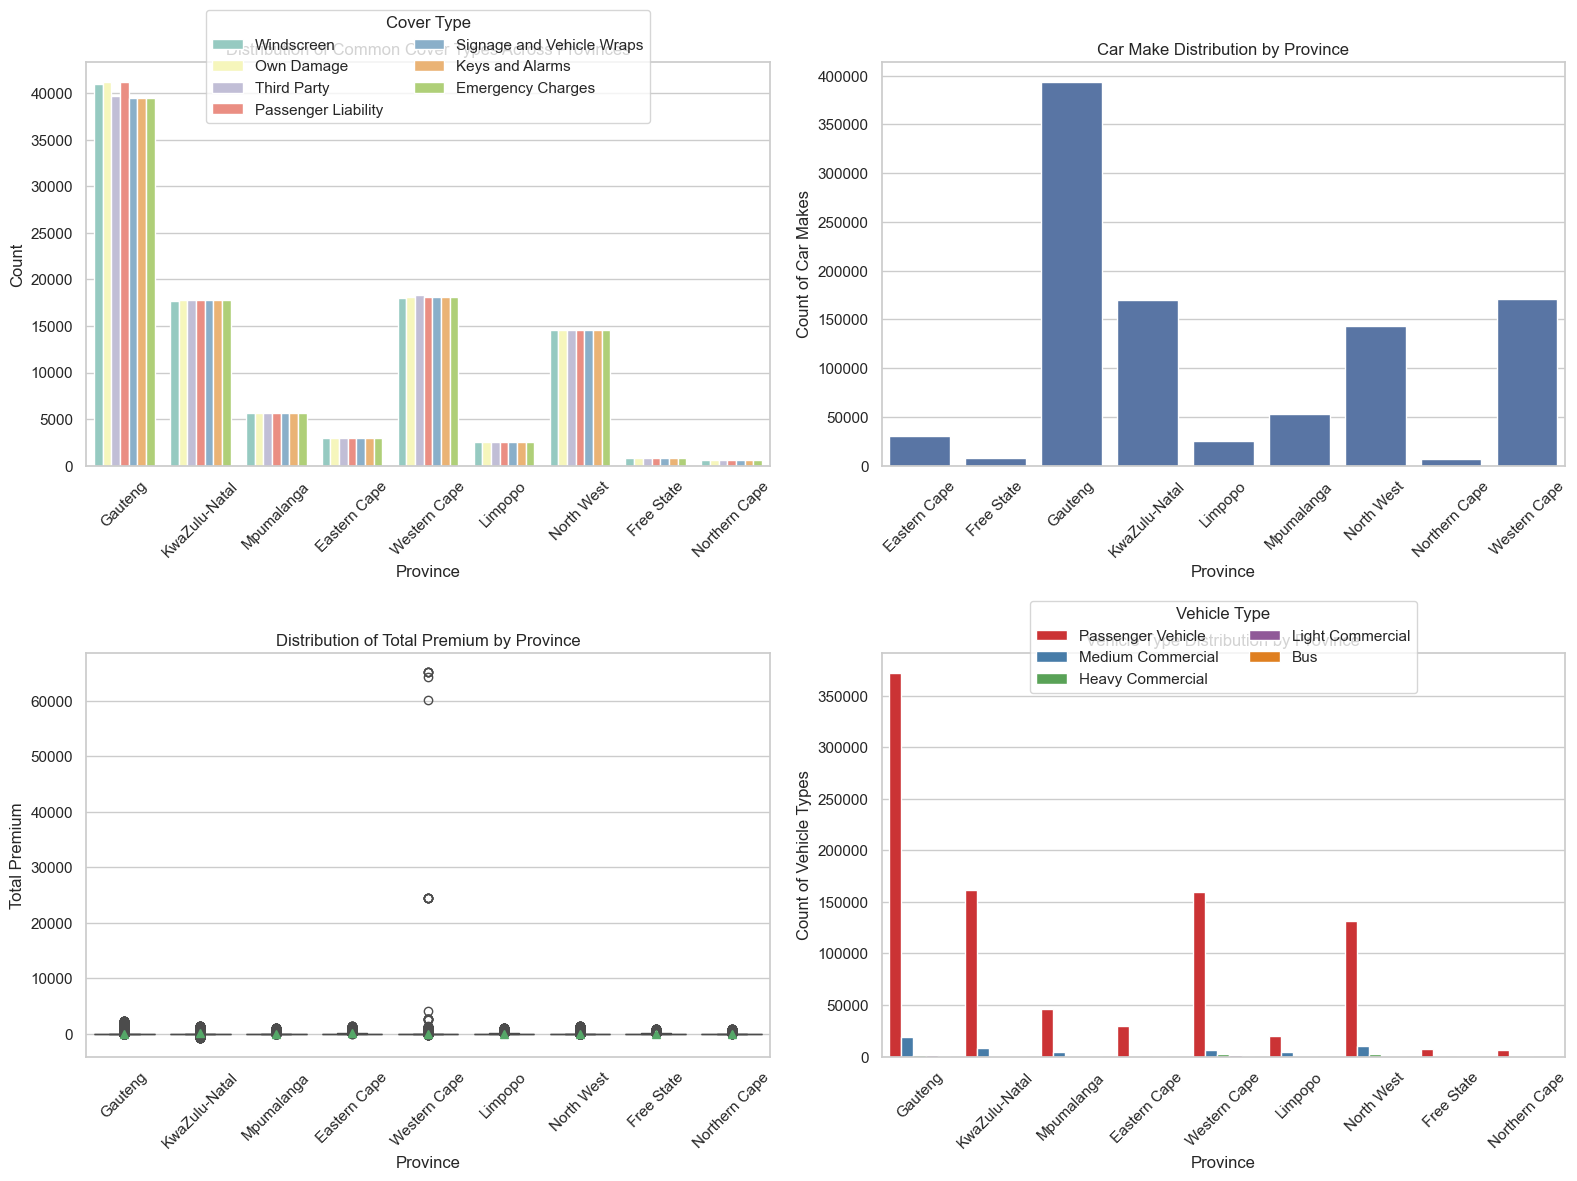

In [25]:
common_cover_types = [
    'Own Damage', 'Passenger Liability', 'Windscreen', 'Third Party', 
    'Keys and Alarms', 'Signage and Vehicle Wraps', 'Emergency Charges', 
    'Cleaning and Removal of Accidental Debris'
]

# Plot the distribution accross regions
vis.plot_geographical_trends(common_cover_types)

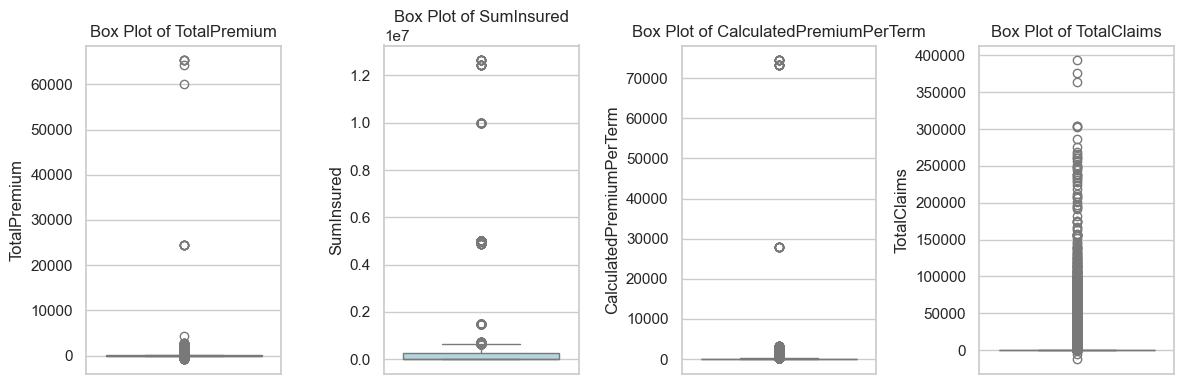

In [26]:
numerical_cols = ['TotalPremium', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalClaims']
# Detect outliers using boxplot
vis.plot_outliers_boxplot(numerical_cols)

Insights and Decisions

1. TotalPremium:

Insight: The box plot shows there are a few outliers on the higher end of the data points.
2. SumInsured:

Insight: The box plot shows a few extreme outliers, significantly higher than the main data range, especially above the 1.2e7 mark.
3. CalculatedPremiumPerTerm:

Insight: The box plot highlights a few significant outliers, especially around the 70,000 mark, far removed from the core data.
4. TotalClaims:

Insight: Several extreme outliers, particularly those above 100,000, are present, indicating a high variance that could mislead future analysis. The median is around 100,000. There are a few outliers on the higher end.
Conclusion: The analysis of box plots highlights outliers in numerical values of the selected variables. To address these issues:

Capping outliers is the preferred approach to retain most data while minimizing distortion.

In [27]:
# Capping outliers of the numerical variables

df_capped = vis.cap_all_outliers(numerical_cols)

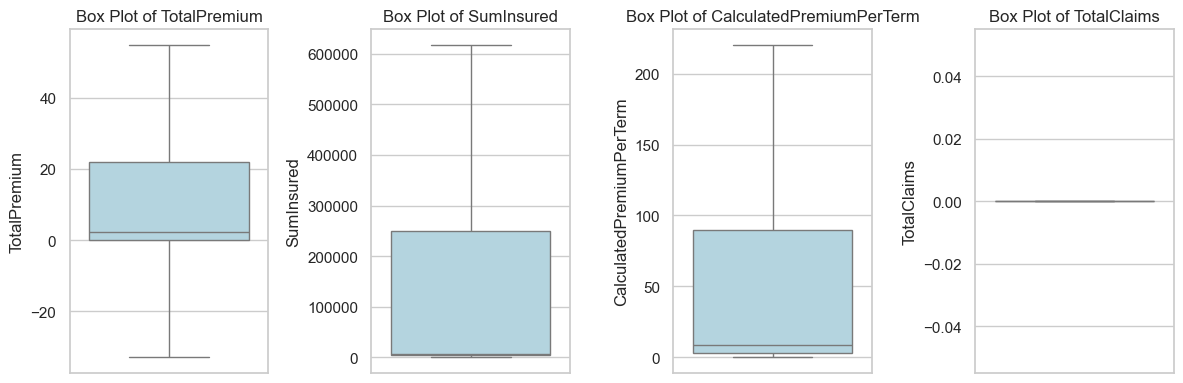

In [28]:
# Check outliers after the outliers were capped
vis1 = DataVisualizer(df_capped)
vis1.plot_outliers_boxplot(numerical_cols)

Capping outliers has resulted in more balanced distributions, which can prevent skewness and help with more accurate analyses. The capping approach preserves the integrity of the data while addressing the extreme values without fully removing them.

In [29]:
# Save the cleaned data to csv for future analysis
df_capped.to_csv('../data/cleaned_data.csv')